# Borůvka's algorithm

## Libraries import

In [1]:
import json                       # Read and write files in json
import numpy as np                # Matrix operations
import networkx as nx             # Graph operation and display
from pprint import pprint         # Pretty printing of matrices
import matplotlib.pyplot as plt   # Plot figures

## Settings

In [2]:
file_path = "test_graph.json"

In [3]:
# Display settings
figure_size = (5,5)            # (x,y) expressed in inches
node_color = "#89b2f4"         # Color of the nodes of the graph in the #RRBBGG format
mst_edges_color = "#FF0000"    # Color of the edges that form the MST
default_edge_colour = "#000000"# Clour of the edges that don't belong to the MST

## Load the graph

In [4]:
with open(file_path,"r") as f:
    graph = json.load(f)
pprint(graph)

[[[1, 0.901], [2, 0.464], [3, 0.197]],
 [[0, 0.901], [2, 0.416], [4, 0.94], [5, 0.665]],
 [[0, 0.464], [1, 0.416], [3, 0.05], [6, 0.224]],
 [[0, 0.197], [2, 0.05], [4, 0.57], [6, 0.028]],
 [[1, 0.94], [3, 0.57], [5, 0.898], [6, 0.931]],
 [[1, 0.665], [4, 0.898]],
 [[2, 0.224], [3, 0.028], [4, 0.931]]]


# Borůvka's algorithm

In [5]:
def find_min_outgoing_edge(graph, tree):
    edges = []
    # for each vertex in the set
    for vertex in tree:
        # for each edge that start at that vertex
        for end,weight in graph[vertex]:
            # if the edge goes to a different set
            if end not in tree:
                # add it to the list of possible outgoing edges
                edges += [(vertex,end,weight)]
    # return the minimum of the outgoing edges
    return min(edges,key=lambda x: x[2])

In [6]:
def find_set_index(tree_list, vertex):
    # for each set
    for index,t_list in enumerate(tree_list):
        # if the vertex is in the set
        if vertex in t_list:
            # return it's index
            return index

In [7]:
n_of_vertices = len(graph)
vertices = list(range(n_of_vertices))
# create a forest of trees with only the root. one for each vertex
tree_list = [[x] for x in vertices]
# Set of edges of the MST
MST_edges = []

while len(tree_list) > 1:
    t_index = 0
    while t_index < len(tree_list):
        # get the set
        tree = tree_list[t_index]
        # find the minimum outgoing edge from the set
        min_edge = find_min_outgoing_edge(graph,tree)
        # add that edge to the list of edges of the MST
        MST_edges += [min_edge]
        # find from which other set is from the destination vertex of the edge
        second_set_index = find_set_index(tree_list, min_edge[1])
        # Merge the two sets
        tree_list[t_index] += tree_list[second_set_index]
        # Delete the second set
        del tree_list[second_set_index]
        # go to the next set
        t_index += 1
# Print the results
pprint(MST_edges)

[(0, 3, 0.197),
 (1, 2, 0.416),
 (4, 3, 0.57),
 (6, 3, 0.028),
 (2, 3, 0.05),
 (5, 1, 0.665)]


# Display the result

/home/zommiommy/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


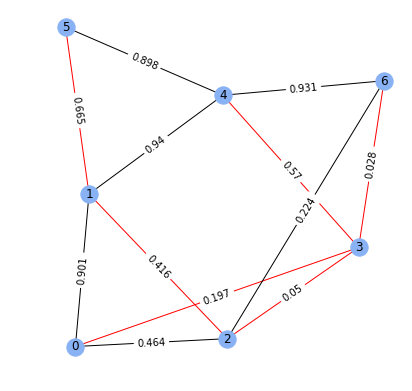

In [8]:
# Create an empty graph
g = nx.Graph()

# add all the vertecies to the graph
for i in range(n_of_vertices):
    g.add_node(i)

# Add all the edges to the graph
for start in range(n_of_vertices):
    for end,weight in graph[start]:
        g.add_edge(start,end,weight=weight)
        
        
for start,end,weight in MST_edges:
    g.add_edge(start,end,weight=weight,color=mst_edges_color)
    
# Display the Graph
# Create and set the dimension of the final image
plt.figure(figsize=figure_size)
# Calculate the spatial disposition of the nodes using the spring algorithm
pos = nx.spring_layout(g)
# Get the colours of the modified edges
colour_dict = nx.get_edge_attributes(g,"color")
# Calculate the colour of the edges
e_color = [ colour_dict.get(edge,default_edge_colour) for edge in g.edges()]
# Draw the graph
nx.draw(g,pos, with_labels=True,node_color=node_color,edge_color=e_color)
# Draw the weight labels over the edges
nx.draw_networkx_edge_labels(g,pos,edge_labels=nx.get_edge_attributes(g,"weight"))
# Show the result
plt.show()

# Borůvka's algorithm class Version

In [9]:
class Boruvka_MST():
    """Class to find the MST using Boruvka's algorithms.
    To simplify the trees are rappresented as sets of nodes 
    and a global set of edges since all the edges choosen will belong to the MST."""
    
    def __init__(self, graph):
        """Initialize the Class and save the values"""
        self.graph = graph
        self.vertices = list(range(len(graph)))
        self.MST_edges = []
        self._initialize_tree_list()
    
    def _initialize_tree_list(self):
        """Initialize the tree list by creating one one node tree for each vertex."""
        self.tree_list = [[x] for x in self.vertices]
        
    def _get_start_vertex(self, edge):
        """Given an edge in the form (start, end, weight) return the start node."""
        return edge[0]
    
    def _get_end_vertex(self, edge):
        """Given an edge in the form (start, end, weight) return the end node."""
        return edge[1]
    
    def _get_weight_vertex(self, edge):
        """Given an edge in the form (start, end, weight) return the end weight."""
        return edge[2]
    
    def _merge_sets(self, first_set_index, second_set_index):
        """Given the indices of the two sets it merge them and replace the first one with the result."""
        # Merge the two sets
        self.tree_list[first_set_index] += self.tree_list[second_set_index]
        # Delete the second set
        del self.tree_list[second_set_index]
        
    def _find_set_index(self, vertex):
        """Find in which tree the node belongs to."""
        # for each set
        for index, tree_vertecies in enumerate(self.tree_list):
            # if the vertex is in the set
            if vertex in tree_vertecies:
                # return it's index
                return index
        
    def _is_there_more_than_one_tree(self):   
        """If the list have more than one sets then there are more than one tree."""
        return len(self.tree_list) > 1
    
    def _get_tree_by_index(self, tree_index):
        """Return the sets of vertex of the tree given it's index."""
        return self.tree_list[tree_index]
    
    def _add_edge_to_MST(self, edge):
        """Add an edge to the MST edges list."""
        self.MST_edges.append(edge)
        
    def _find_min(self,tree, edge):
        """Check if the edge is outgoing and then if it's a new minimum set it as the new min."""
        # if the edge is intern to the set than ignore it
        if self._get_end_vertex(edge) in tree:
            return
        
        # If the minimum is not set then set it to the current edge
        if self.minimum_edge == None:
            self.minimum_edge = edge
            
        # if it's a new minimum update it
        if self._get_weight_vertex(self.minimum_edge) > self._get_weight_vertex(edge):
            self.minimum_edge = edge  
    
    def _find_min_outgoing_edge(self, tree):
        """Find the minimum outgoing edge from the tree."""
        self.minimum_edge = None
        # for each vertex in the set
        for vertex in tree:
            # for each edge that start at that vertex
            for end,weight in self.graph[vertex]:
                self._find_min(tree, (vertex, end, weight))
        # return the minimum of the outgoing edges
        return self.minimum_edge
    
    def _merge_tree(self, tree_index):
        """Find the closest tree to the one given and merge them."""
        # find the minimum outgoing edge from the set
        min_edge = self._find_min_outgoing_edge(self._get_tree_by_index(tree_index))
        # add that edge to the list of edges of the MST
        self._add_edge_to_MST(min_edge)
        # find from which other set is from the destination vertex of the edge
        second_set_index = self._find_set_index(self._get_end_vertex(min_edge))
        # Merge the two sets
        self._merge_sets(tree_index, second_set_index)
    
    def _merge_trees(self):
        """Iterate over all the trees merging them."""
        tree_index = 0
        while tree_index < len(self.tree_list):
            # Merge the tree
            self._merge_tree(tree_index)
            # go to the next set
            tree_index += 1
    
    def run(self):
        """Find the MST of the given graph."""
        while self._is_there_more_than_one_tree():
            self._merge_trees()
            
        return self.MST_edges
    

In [10]:
MST_edges = Boruvka_MST(graph).run()
pprint(MST_edges)

[(0, 3, 0.197),
 (1, 2, 0.416),
 (4, 3, 0.57),
 (6, 3, 0.028),
 (2, 3, 0.05),
 (5, 1, 0.665)]
